In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 11 19:15:23 2020

@author: juan
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
import math
import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process

os.makedirs('GraficasProyDNN',exist_ok=True)


In [2]:
#==============================================================================
#LEER DATOS
#==============================================================================
fecha = '2021-08-31'

casos = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

sintomas = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

poblaciones = pd.read_excel('PoblacionMunicipal.xlsx')

#==============================================================================
#ELIMINAR SIN DATO
#==============================================================================

casos = casos[casos.codigo_municipio != 99]

sintomas = sintomas[sintomas.codigo_municipio != 99]

codigoCasos = casos['codigo_municipio']

codigoSintomas = sintomas['codigo_municipio']

codigoPob = poblaciones['codigo_municipio']

faltanCasosMuni = np.array(list(set(casos.municipio).symmetric_difference(poblaciones.municipio)))
faltanCasosDepto = []
for i in range(len(faltanCasosMuni)):
    faltanCasosDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'departamento'].iloc[0])
faltanCasosCodigoMuni = []
for i in range(len(faltanCasosMuni)):
    faltanCasosCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'codigo_municipio'].iloc[0])
faltanCasosPob = []
for i in range(len(faltanCasosMuni)):
    faltanCasosPob.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'poblacion'].iloc[0])
faltanCasosCodigoDepto = []
for i in range(len(faltanCasosMuni)):
    if faltanCasosDepto[i] == 'ALTA VERAPAZ':
        faltanCasosCodigoDepto.append(16)
    elif faltanCasosDepto[i] == 'BAJA VERAPAZ':
        faltanCasosCodigoDepto.append(15)
    elif faltanCasosDepto[i] == 'CHIMALTENANGO':
        faltanCasosCodigoDepto.append(4)
    elif faltanCasosDepto[i] == 'CHIQUIMULA':
        faltanCasosCodigoDepto.append(20)
    elif faltanCasosDepto[i] == 'EL PROGRESO':
        faltanCasosCodigoDepto.append(2)
    elif faltanCasosDepto[i] == 'ESCUINTLA':
        faltanCasosCodigoDepto.append(5)
    elif faltanCasosDepto[i] == 'GUATEMALA':
        faltanCasosCodigoDepto.append(1)
    elif faltanCasosDepto[i] == 'HUEHUETENANGO':
        faltanCasosCodigoDepto.append(13)
    elif faltanCasosDepto[i] == 'IZABAL':
        faltanCasosCodigoDepto.append(18)
    elif faltanCasosDepto[i] == 'JALAPA':
        faltanCasosCodigoDepto.append(21)
    elif faltanCasosDepto[i] == 'JUTIAPA':
        faltanCasosCodigoDepto.append(22)
    elif faltanCasosDepto[i] == 'PETEN':
        faltanCasosCodigoDepto.append(17)
    elif faltanCasosDepto[i] == 'QUETZALTENANGO':
        faltanCasosCodigoDepto.append(9)
    elif faltanCasosDepto[i] == 'QUICHE':
        faltanCasosCodigoDepto.append(14)
    elif faltanCasosDepto[i] == 'RETALHULEU':
        faltanCasosCodigoDepto.append(11)
    elif faltanCasosDepto[i] == 'SACATEPEQUEZ':
        faltanCasosCodigoDepto.append(3)
    elif faltanCasosDepto[i] == 'SAN MARCOS':
        faltanCasosCodigoDepto.append(12)
    elif faltanCasosDepto[i] == 'SANTA ROSA':
        faltanCasosCodigoDepto.append(6)
    elif faltanCasosDepto[i] == 'SOLOLA':
        faltanCasosCodigoDepto.append(7)
    elif faltanCasosDepto[i] == 'SUCHITEPEQUEZ':
        faltanCasosCodigoDepto.append(10)
    elif faltanCasosDepto[i] == 'TOTONICAPAN':
        faltanCasosCodigoDepto.append(8)
    elif faltanCasosDepto[i] == 'ZACAPA':
        faltanCasosCodigoDepto.append(19)

faltanSintomasMuni = np.array(list(set(sintomas.municipio).symmetric_difference(poblaciones.municipio)))
faltanSintomasDepto = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'departamento'].iloc[0])
faltanSintomasCodigoMuni = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'codigo_municipio'].iloc[0])
faltanSintomasPob = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasPob.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'poblacion'].iloc[0])
faltanSintomasCodigoDepto = []
for i in range(len(faltanSintomasMuni)):
    if faltanSintomasDepto[i] == 'ALTA VERAPAZ':
        faltanSintomasCodigoDepto.append(16)
    elif faltanSintomasDepto[i] == 'BAJA VERAPAZ':
        faltanSintomasCodigoDepto.append(15)
    elif faltanSintomasDepto[i] == 'CHIMALTENANGO':
        faltanSintomasCodigoDepto.append(4)
    elif faltanSintomasDepto[i] == 'CHIQUIMULA':
        faltanSintomasCodigoDepto.append(20)
    elif faltanSintomasDepto[i] == 'EL PROGRESO':
        faltanSintomasCodigoDepto.append(2)
    elif faltanSintomasDepto[i] == 'ESCUINTLA':
        faltanSintomasCodigoDepto.append(5)
    elif faltanSintomasDepto[i] == 'GUATEMALA':
        faltanSintomasCodigoDepto.append(1)
    elif faltanSintomasDepto[i] == 'HUEHUETENANGO':
        faltanSintomasCodigoDepto.append(13)
    elif faltanSintomasDepto[i] == 'IZABAL':
        faltanSintomasCodigoDepto.append(18)
    elif faltanSintomasDepto[i] == 'JALAPA':
        faltanSintomasCodigoDepto.append(21)
    elif faltanSintomasDepto[i] == 'JUTIAPA':
        faltanSintomasCodigoDepto.append(22)
    elif faltanSintomasDepto[i] == 'PETEN':
        faltanSintomasCodigoDepto.append(17)
    elif faltanSintomasDepto[i] == 'QUETZALTENANGO':
        faltanSintomasCodigoDepto.append(9)
    elif faltanSintomasDepto[i] == 'QUICHE':
        faltanSintomasCodigoDepto.append(14)
    elif faltanSintomasDepto[i] == 'RETALHULEU':
        faltanSintomasCodigoDepto.append(11)
    elif faltanSintomasDepto[i] == 'SACATEPEQUEZ':
        faltanSintomasCodigoDepto.append(3)
    elif faltanSintomasDepto[i] == 'SAN MARCOS':
        faltanSintomasCodigoDepto.append(12)
    elif faltanSintomasDepto[i] == 'SANTA ROSA':
        faltanSintomasCodigoDepto.append(6)
    elif faltanSintomasDepto[i] == 'SOLOLA':
        faltanSintomasCodigoDepto.append(7)
    elif faltanSintomasDepto[i] == 'SUCHITEPEQUEZ':
        faltanSintomasCodigoDepto.append(10)
    elif faltanSintomasDepto[i] == 'TOTONICAPAN':
        faltanSintomasCodigoDepto.append(8)
    elif faltanSintomasDepto[i] == 'ZACAPA':
        faltanSintomasCodigoDepto.append(19)
#==============================================================================
#AGREGAR DATOS QUE FALTAN
#==============================================================================
#extraer una fila del df de casos
primerafila = casos.iloc[1]
primerafila = primerafila.iloc[5:].values
datosFaltan = np.zeros(len(primerafila))

datosFaltanCasosCols = casos.columns
datosFaltanSintomasCols = sintomas.columns

datosFaltanCasos = np.zeros((len(faltanCasosDepto),len(datosFaltanCasosCols))).astype(object)
for i in range(len(faltanCasosDepto)):
    for j in range(len(datosFaltanCasosCols)):
        if j ==0:
            datosFaltanCasos[i][j] = faltanCasosDepto[i]
        elif j==1:
            datosFaltanCasos[i][j] = faltanCasosCodigoDepto[i]
        elif j==2:
            datosFaltanCasos[i][j] = faltanCasosMuni[i]
        elif j==3:
            datosFaltanCasos[i][j] = faltanCasosCodigoMuni[i]
        elif j==4:
            datosFaltanCasos[i][j] = faltanCasosPob[i]
            
datosFaltanSintomas = np.zeros((len(faltanSintomasDepto),len(datosFaltanSintomasCols))).astype(object)
for i in range(len(faltanSintomasDepto)):
    for j in range(len(datosFaltanSintomasCols)):
        if j ==0:
            datosFaltanSintomas[i][j] = faltanSintomasDepto[i]
        elif j==1:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoDepto[i]
        elif j==2:
            datosFaltanSintomas[i][j] = faltanSintomasMuni[i]
        elif j==3:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoMuni[i]
        elif j==4:
            datosFaltanSintomas[i][j] = faltanSintomasPob[i]
            
FaltanCasos = pd.DataFrame(datosFaltanCasos,columns=casos.columns)
FaltanSintomas = pd.DataFrame(datosFaltanSintomas,columns=sintomas.columns)

print('En casos positivos no hay datos de ' + str(FaltanCasos['municipio'].values))
print('En sintomas no hay datos de ' + str(FaltanSintomas['municipio'].values))

casos = casos.append(FaltanCasos)
sintomas = sintomas.append(FaltanSintomas)

#==============================================================================
#EXTRAER DATOS POR DEPARTAMENTO
#==============================================================================

departamentos = casos['departamento'].unique()
municipios = casos['municipio'].unique()

NOMBREDEPTO = []
Poblacion =[]
POSITIVOSDEPTO = []
SINTOMASDEPTO = []

for depto in departamentos:
    NOMBREDEPTO.append(depto)



En casos positivos no hay datos de []
En sintomas no hay datos de []


/tmp/ipykernel_11228/2979808534.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  casos = casos.append(FaltanCasos)
/tmp/ipykernel_11228/2979808534.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sintomas = sintomas.append(FaltanSintomas)


In [3]:
def Poisson(l,x):
    p = l**x*np.exp(-l)/np.math.factorial(x)
    
    return p

In [4]:
def DISCRETIZAR(distribucion):
    distribucion = np.array(distribucion)*1000
    return np.floor(distribucion)
    

In [5]:
def AMPLIFICAR(distribucion):
    distribucion = np.array(distribucion)*1000
    return distribucion

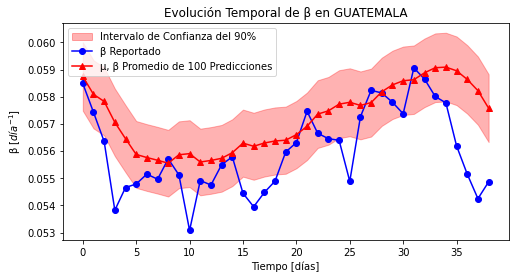

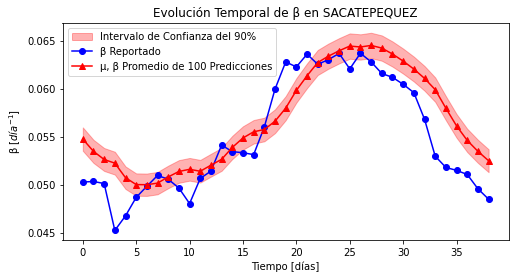

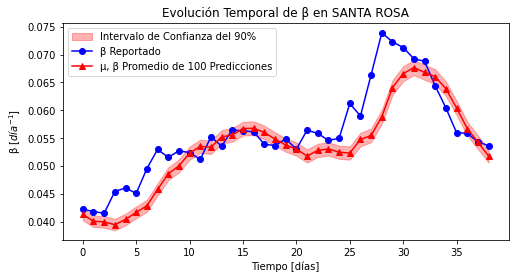

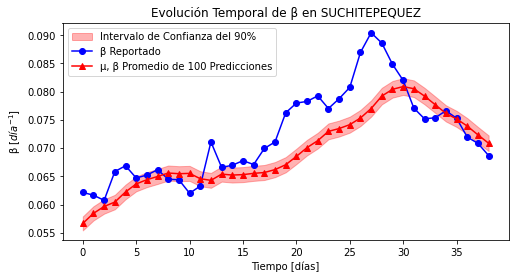

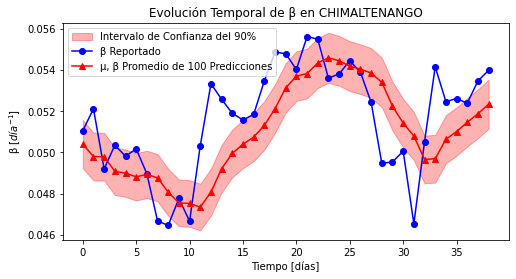

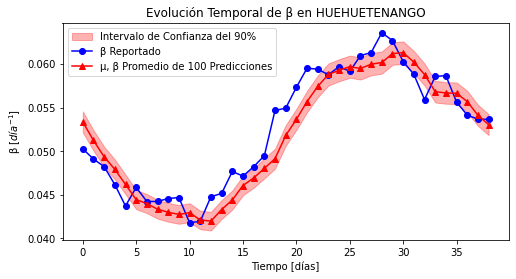

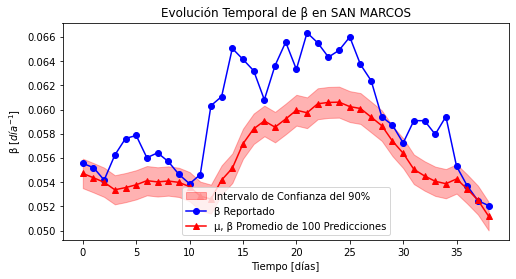

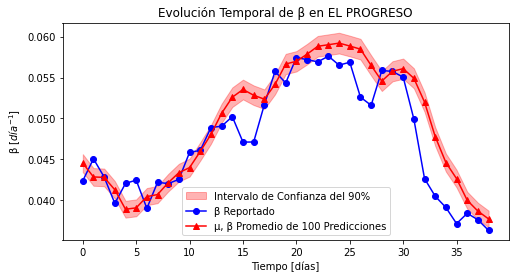

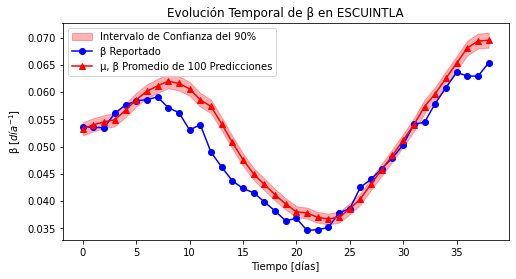

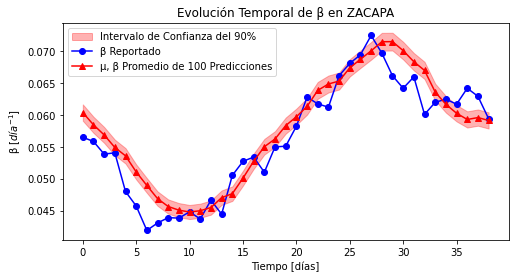

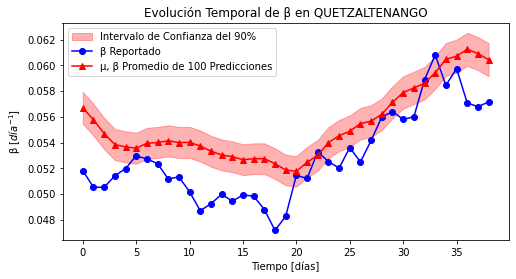

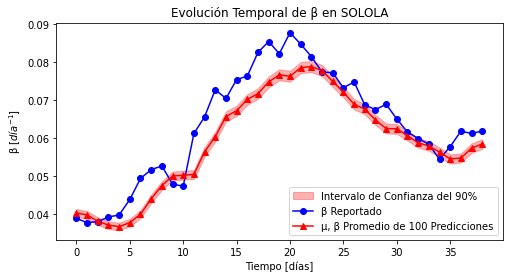

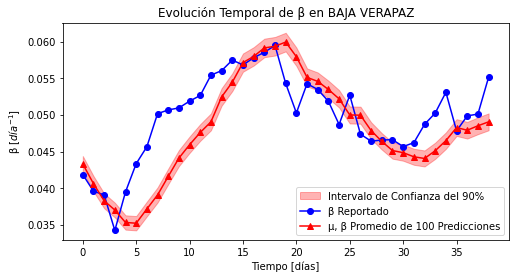

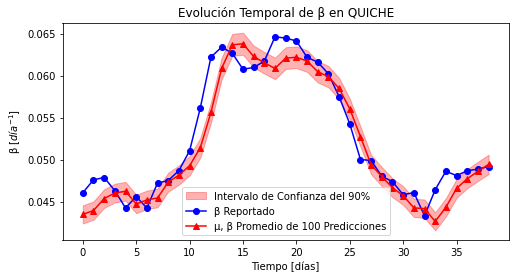

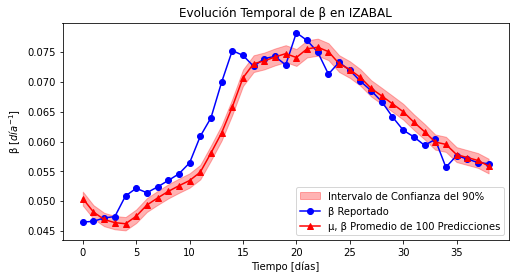

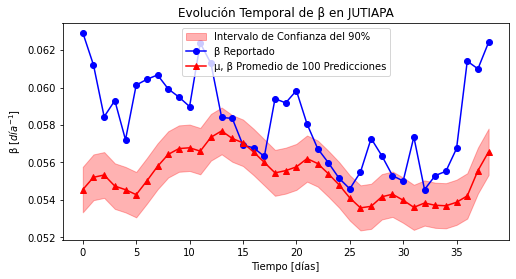

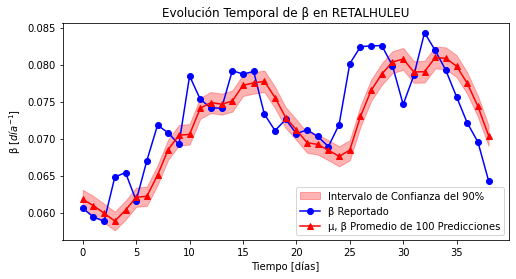

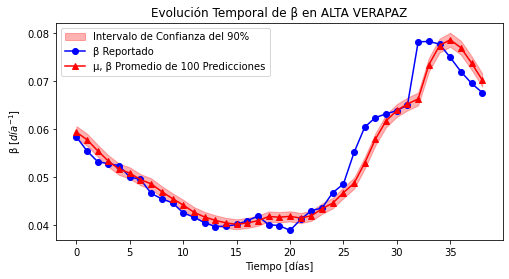

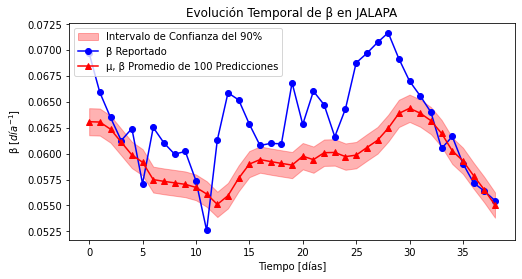

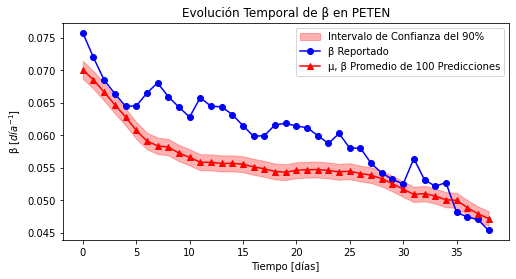

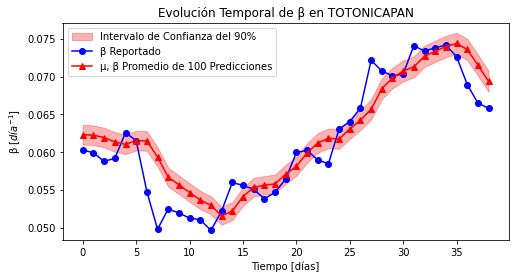

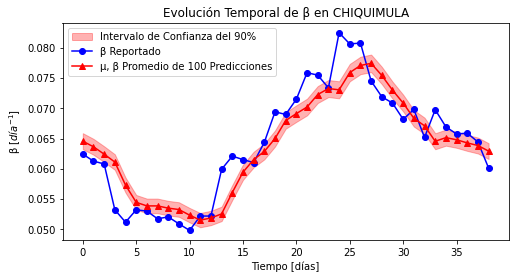

In [7]:
#OBSERVANDO LAS DISTRIBUCIONES
#Ahora SÍ HARE EL TRASLADO, AL VERDADERO LE RESTARE EL MINIMO DE LOS CALCULADOS.
#hacer el traslado en las predicciones me complica para compararlas con los valores reales escalados, qué traslado
#le haría a los valores reales? Asi que mejor no hago el traslado
#aunque esto no deberia importar pues solo quiero observar el tipo de distribucion,no necesito comparar con los 
#resultados reales pues por dia tengo solo un dato observado.
DIAS = 39
t = []
for k in range(39):
    t.append(k)
    
for n in range(22): #n-esimo departamento, en este caso solo para Guatemala.
    promedio = []
    DISTRIBUCION = []
    DISTRIBUCION2 = [] #contiene los beta originales no discretizados.
    ACTUAL = [] #listado con los valores observado (uno por dia)
    ACTUAL2 = []
    for dia in range(DIAS): #calcula el promedio diario de las 100 redes para 39 dias, o 40?
        distribucion = []
        actual = []
        distribucion2 = []
        actual2 = []
        for m in range(100): #para las m redes neuronales utilizadas.
            #leyendo el archivo generado por otro script.
            coeficientesBeta = pd.read_csv(NOMBREDEPTO[n] + 'BetaPrediccion'+str(m)+'.csv') 
            datos = coeficientesBeta["Beta Prediccion"][dia] #beta para cierto dia, datos es UN numero
            distribucion.append(datos) #listado de los m betas predichos cierto dia. 
            distribucion2.append(datos)
            datos_observados = coeficientesBeta["Beta Real"][dia]
            actual.append(datos_observados)
            actual2.append(datos_observados)
            #########################################################
            #Distribucion es la 
            #Matriz que contiene en cada fila las predicciones de todas las redes para cierto dia
        #######################################    
        distribucion = DISCRETIZAR(distribucion)
        MINIMO = min(distribucion)
        distribucion = distribucion - MINIMO
        actual = DISCRETIZAR(actual)#en realidad me interesa discretizarlo?

        DISTRIBUCION.append(distribucion)
        ACTUAL.append(actual)
        
        distribucion2 = AMPLIFICAR(distribucion2)
        actual2 = AMPLIFICAR(actual2) 
        DISTRIBUCION2.append(distribucion2)
        ACTUAL2.append(actual2)
        
        l = np.mean(distribucion)
        Poisson_Grafica = []
        X = []
        #for x in distribucion:
        #    a = Poisson(l,x)
        #    Poisson_Grafica.append(a)
        #    X.append(x)
        #plt.plot(X,Poisson_Grafica, '*' , c = 'k', label = 'P(x,\u03BB = ' + str(l) + ')')
        #_ = plt.hist(distribucion, bins=7, density=True, histtype='bar', ec='black', color='y',label="Distribución Observada")   
        #plt.legend()
        #plt.title("Distribución de \u03B2 en " + NOMBREDEPTO[n]+ " el día " + str(dia))
        #plt.xlabel("1000\u03B2 - " + str(MINIMO))
        #plt.savefig('HISTOGRAMAS_POISSON1/'+NOMBREDEPTO[n]+ 'HISTPOISSON' + str(dia) + '.png', bbox_inches = 'tight')
        #plt.show()
        #ME FALTA INDICAR LAS UNIDADES DE BETA
#con esto verificamos visualmente que una distribucion de poisson se adapta bien.
        ###################################################### Fin de if
    
    ACTUAL2 = np.transpose(ACTUAL2)
    ACTUAL2 = np.array(ACTUAL2)
    #Ahora estamos interesados en guardar archivos los limites de la banda de incerteza.
    #Primero observaremos el 90% de confianza 
    N = 100
    DESVEST = [] #guardara el intervalo de confianza
    PROMEDIO = []
    LimInf = []
    LimSup = []
    for i in DISTRIBUCION2:
        mu = np.mean(np.array(i))
        DesvEst = math.sqrt(mu) #porque es poisson
        I = 1.645*DesvEst/math.sqrt(N)
        DESVEST.append(I)
        PROMEDIO.append(mu)
        LimInf.append(mu-I)
        LimSup.append(mu+I)
    df = pd.DataFrame.from_dict({"Beta": PROMEDIO, "Desviacion 90%": DESVEST, "Limite Inferior": LimInf, "Limite Superior": LimSup })
    df.to_csv(NOMBREDEPTO[n] + 'BetaCon90%Poisson.csv', index=False)

#graficar aca mismo
    plt.figure(figsize=(8,4))
    #ax = sns.lineplot(x, C, color='red', ci=95)
    coeficientesBeta = pd.read_csv(NOMBREDEPTO[n] + 'BetaCon90%Poisson.csv')
    plt.fill_between(t,coeficientesBeta["Limite Inferior"]/1000, coeficientesBeta["Limite Superior"]/1000, 
                     color = 'r', alpha = 0.3, label='Intervalo de Confianza del 90%')
  #  plt.plot(coeficientesBeta["Limite Superior"],'y.', label="Mean Value \u00B1 \u03C3")
    coeficientesBeta2 = pd.read_csv(NOMBREDEPTO[n] + 'BetaPrediccion'+str(0)+'.csv') #las m redes tienen como
    #primera columna el valor real, observado, de beta.
    plt.plot(ACTUAL2[0]/1000, 'bo-', label="\u03B2 Reportado")
    plt.plot(np.array(PROMEDIO)/1000, 'r^-', label="\u03BC, \u03B2 Promedio de 100 Predicciones") ##promedio de beta en cada dia
    plt.legend(loc="best")
    plt.title("Evolución Temporal de \u03B2 en " + NOMBREDEPTO[n])
    plt.xlabel("Tiempo [días]")
    plt.ylabel("\u03B2 $[día^{-1}]$") #Aca no va la traslacion al origen, ya vimos que sí sigue la distr de Poisson.

    plt.savefig('EVOLUCIONBETA/'+NOMBREDEPTO[n]+'EVOLUCION_90_Poisson'+ '.pdf', bbox_inches = 'tight')
    #plt.savefig('EVOLUCIONBETA/'+NOMBREDEPTO[n]+'EVOLUCION_90_Poisson'+ '.png', bbox_inches = 'tight')

    plt.show()
    #plt.tight_layout()
                


In [ ]:
#Confidence
#Interval	Z
#80%	1,282
#85%	1,440
#90%	1,645
#95%	1,960
#99%	2,576
#99,5%	2,807
#99,9%	3,291

In [ ]:
#en este script ya no modificamos ACTUAL2 el verdadero valor de beta.
#considere que para calcular el promedio hemos perdido  información al hacer la discretización.